In [1]:
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os
import seaborn as sns

%pylab inline
#pl.rcParams.update(s)

Populating the interactive namespace from numpy and matplotlib


/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


# Idea: 

## On average, men takes trips that are shorter


# Null Hypothesis:

## The average trip length for males is shorter than the average trip length for females


# Alternative Hypothesis: 

## The average trip length for males is longer than the average trip length for females

# significance level  $\alpha=0.05$


In [2]:
PUIDATA = os.getenv("PUIDATA")
print(PUIDATA)

/home/cusp/ep2247/PUIdata


In [3]:
CUSP = '/gws/open/Student/cikibike'
print(CUSP)

/gws/open/Student/cikibike


In [4]:
url = (CUSP+"/201707-citibike-tripdata.csv.zip")
print(url)
df = pd.read_csv("/gws/open/Student/citibike/201707-citibike-tripdata.csv.zip")
df['startdate'] = pd.to_datetime(df['starttime'])
df['enddate'] = pd.to_datetime(df['stoptime'])
df.head()

/gws/open/Student/cikibike/201707-citibike-tripdata.csv.zip


,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,startdate,enddate
0,364,2017-07-01 00:00:00,2017-07-01 00:06:05,539,Metropolitan Ave & Bedford Ave,40.715348,-73.960241,3107,Bedford Ave & Nassau Ave,40.723117,-73.952123,14744,Subscriber,1986.0,1,2017-07-01 00:00:00,2017-07-01 00:06:05
1,2142,2017-07-01 00:00:03,2017-07-01 00:35:46,293,Lafayette St & E 8 St,40.730207,-73.991026,3425,2 Ave & E 104 St,40.789210,-73.943708,19587,Subscriber,1981.0,1,2017-07-01 00:00:03,2017-07-01 00:35:46
2,328,2017-07-01 00:00:08,2017-07-01 00:05:37,3242,Schermerhorn St & Court St,40.691029,-73.991834,3397,Court St & Nelson St,40.676395,-73.998699,27937,Subscriber,1984.0,2,2017-07-01 00:00:08,2017-07-01 00:05:37
3,2530,2017-07-01 00:00:11,2017-07-01 00:42:22,2002,Wythe Ave & Metropolitan Ave,40.716887,-73.963198,398,Atlantic Ave & Furman St,40.691652,-73.999979,26066,Subscriber,1985.0,1,2017-07-01 00:00:11,2017-07-01 00:42:22
4,2534,2017-07-01 00:00:15,2017-07-01 00:42:29,2002,Wythe Ave & Metropolitan Ave,40.716887,-73.963198,398,Atlantic Ave & Furman St,40.691652,-73.999979,29408,Subscriber,1982.0,2,2017-07-01 00:00:15,2017-07-01 00:42:29


In [5]:
df.dtypes

tripduration                        int64
starttime                          object
stoptime                           object
start station id                    int64
start station name                 object
start station latitude            float64
start station longitude           float64
end station id                      int64
end station name                   object
end station latitude              float64
end station longitude             float64
bikeid                              int64
usertype                           object
birth year                        float64
gender                              int64
startdate                  datetime64[ns]
enddate                    datetime64[ns]
dtype: object

In [6]:
df.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender', u'startdate', u'enddate'],
      dtype='object')

In [7]:
df.drop(['start station id','starttime','stoptime', 'start station name',
         'start station latitude', 'start station longitude', 'end station id',
         'end station name', 'end station latitude', 'birth year', 'end station longitude',
         'bikeid', 'usertype'], axis=1, inplace=True)

In [8]:
df.head()

,tripduration,gender,startdate,enddate
0,364,1,2017-07-01 00:00:00,2017-07-01 00:06:05
1,2142,1,2017-07-01 00:00:03,2017-07-01 00:35:46
2,328,2,2017-07-01 00:00:08,2017-07-01 00:05:37
3,2530,1,2017-07-01 00:00:11,2017-07-01 00:42:22
4,2534,2,2017-07-01 00:00:15,2017-07-01 00:42:29


In [9]:
df['tripduration'] = df['tripduration'] / 60

In [10]:
df.head()

,tripduration,gender,startdate,enddate
0,6.066667,1,2017-07-01 00:00:00,2017-07-01 00:06:05
1,35.700000,1,2017-07-01 00:00:03,2017-07-01 00:35:46
2,5.466667,2,2017-07-01 00:00:08,2017-07-01 00:05:37
3,42.166667,1,2017-07-01 00:00:11,2017-07-01 00:42:22
4,42.233333,2,2017-07-01 00:00:15,2017-07-01 00:42:29


In [11]:
df['startdate'] = df['startdate'].dt.date

In [12]:
df.head()

,tripduration,gender,startdate,enddate
0,6.066667,1,2017-07-01,2017-07-01 00:06:05
1,35.700000,1,2017-07-01,2017-07-01 00:35:46
2,5.466667,2,2017-07-01,2017-07-01 00:05:37
3,42.166667,1,2017-07-01,2017-07-01 00:42:22
4,42.233333,2,2017-07-01,2017-07-01 00:42:29


In [13]:
df1 = df[['tripduration','gender']]
df1.head()

,tripduration,gender
0,6.066667,1
1,35.700000,1
2,5.466667,2
3,42.166667,1
4,42.233333,2


In [14]:
df1.gender = df1.gender.replace(1,"Male")
df1.gender = df1.gender.replace(2,"Female")
df1.head()

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/pandas/core/generic.py:2701: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


,tripduration,gender
0,6.066667,Male
1,35.700000,Male
2,5.466667,Female
3,42.166667,Male
4,42.233333,Female


In [43]:
hist1 = df1[df1["tripduration"]<40]
hist1.head()
hist1.count()

tripduration    1673371
gender          1673371
dtype: int64

In [75]:
hist2 = hist1[hist1["gender"]=="Male"]
hist2.head()
hist2.count()

tripduration    1076311
gender          1076311
dtype: int64

In [74]:
hist3 = hist1[hist1["gender"]=="Female"]
hist3.head()
hist3.count()

tripduration    388897
gender          388897
dtype: int64

In [18]:
male_df = df[df.gender == 1]
male_df = male_df.groupby('startdate').mean()
male_df.drop(['gender'], axis=1, inplace=True)
male_df.columns = ['Average Male Trip Duration']

In [19]:
male_df.head()

,Average Male Trip Duration
startdate,
2017-07-01,18.111268
2017-07-02,20.141165
2017-07-03,18.276041
2017-07-04,22.380926
2017-07-05,15.635412


In [20]:
female_df = df[df.gender == 2]
female_df = female_df.groupby('startdate').mean()
female_df.drop(['gender'], axis=1, inplace=True)
female_df.columns = ['Average Female Trip Duration']

In [21]:
female_df.head()

,Average Female Trip Duration
startdate,
2017-07-01,21.782166
2017-07-02,24.100578
2017-07-03,19.129823
2017-07-04,19.975015
2017-07-05,18.953602


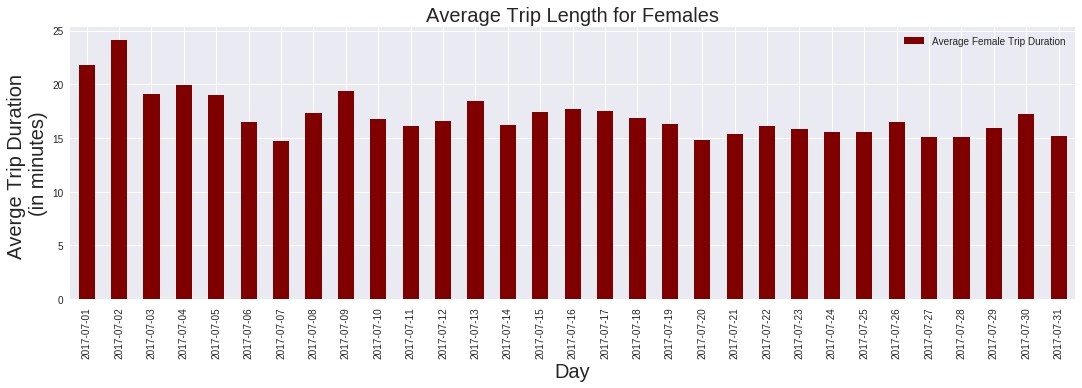

In [22]:
#plot female

ax1 = female_df.plot(kind = "bar", figsize=(18,5), color = 'Maroon')
ax1.set_ylabel("Averge Trip Duration \n(in minutes)", fontsize="20")
ax1.set_xlabel("Day", fontsize="20")
ax1.set_title('Average Trip Length for Females', fontsize=20)

## Figure 1: Daily Average Trip Length for Females

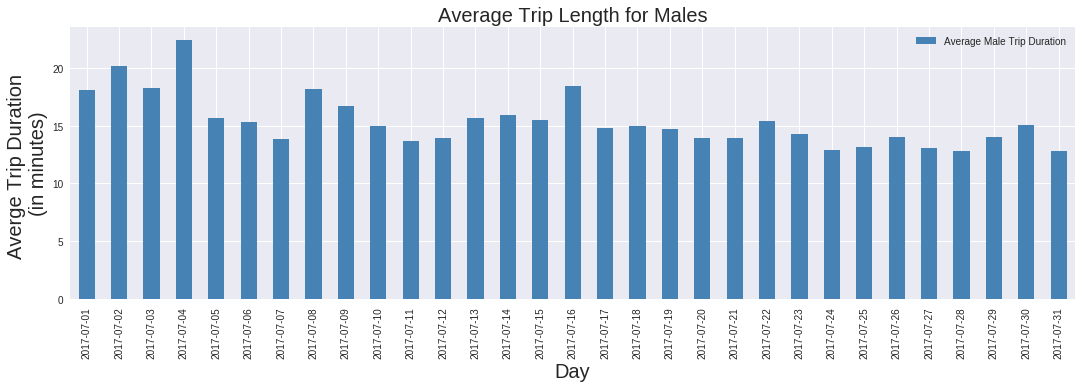

In [23]:
#plot male

ax2 = male_df.plot(kind = "bar", figsize=(18,5), color = 'SteelBlue')
ax2.set_ylabel("Averge Trip Duration \n(in minutes)", fontsize="20")
ax2.set_xlabel("Day", fontsize="20")
ax2.set_title('Average Trip Length for Males', fontsize=20)

## Figure 2: Daily average trip length for Males

In [24]:
#play around plots

In [25]:
gender_df = pd.concat([female_df, male_df], axis=1)

In [26]:
gender_df.head()

,Average Female Trip Duration,Average Male Trip Duration
startdate,,
2017-07-01,21.782166,18.111268
2017-07-02,24.100578,20.141165
2017-07-03,19.129823,18.276041
2017-07-04,19.975015,22.380926
2017-07-05,18.953602,15.635412


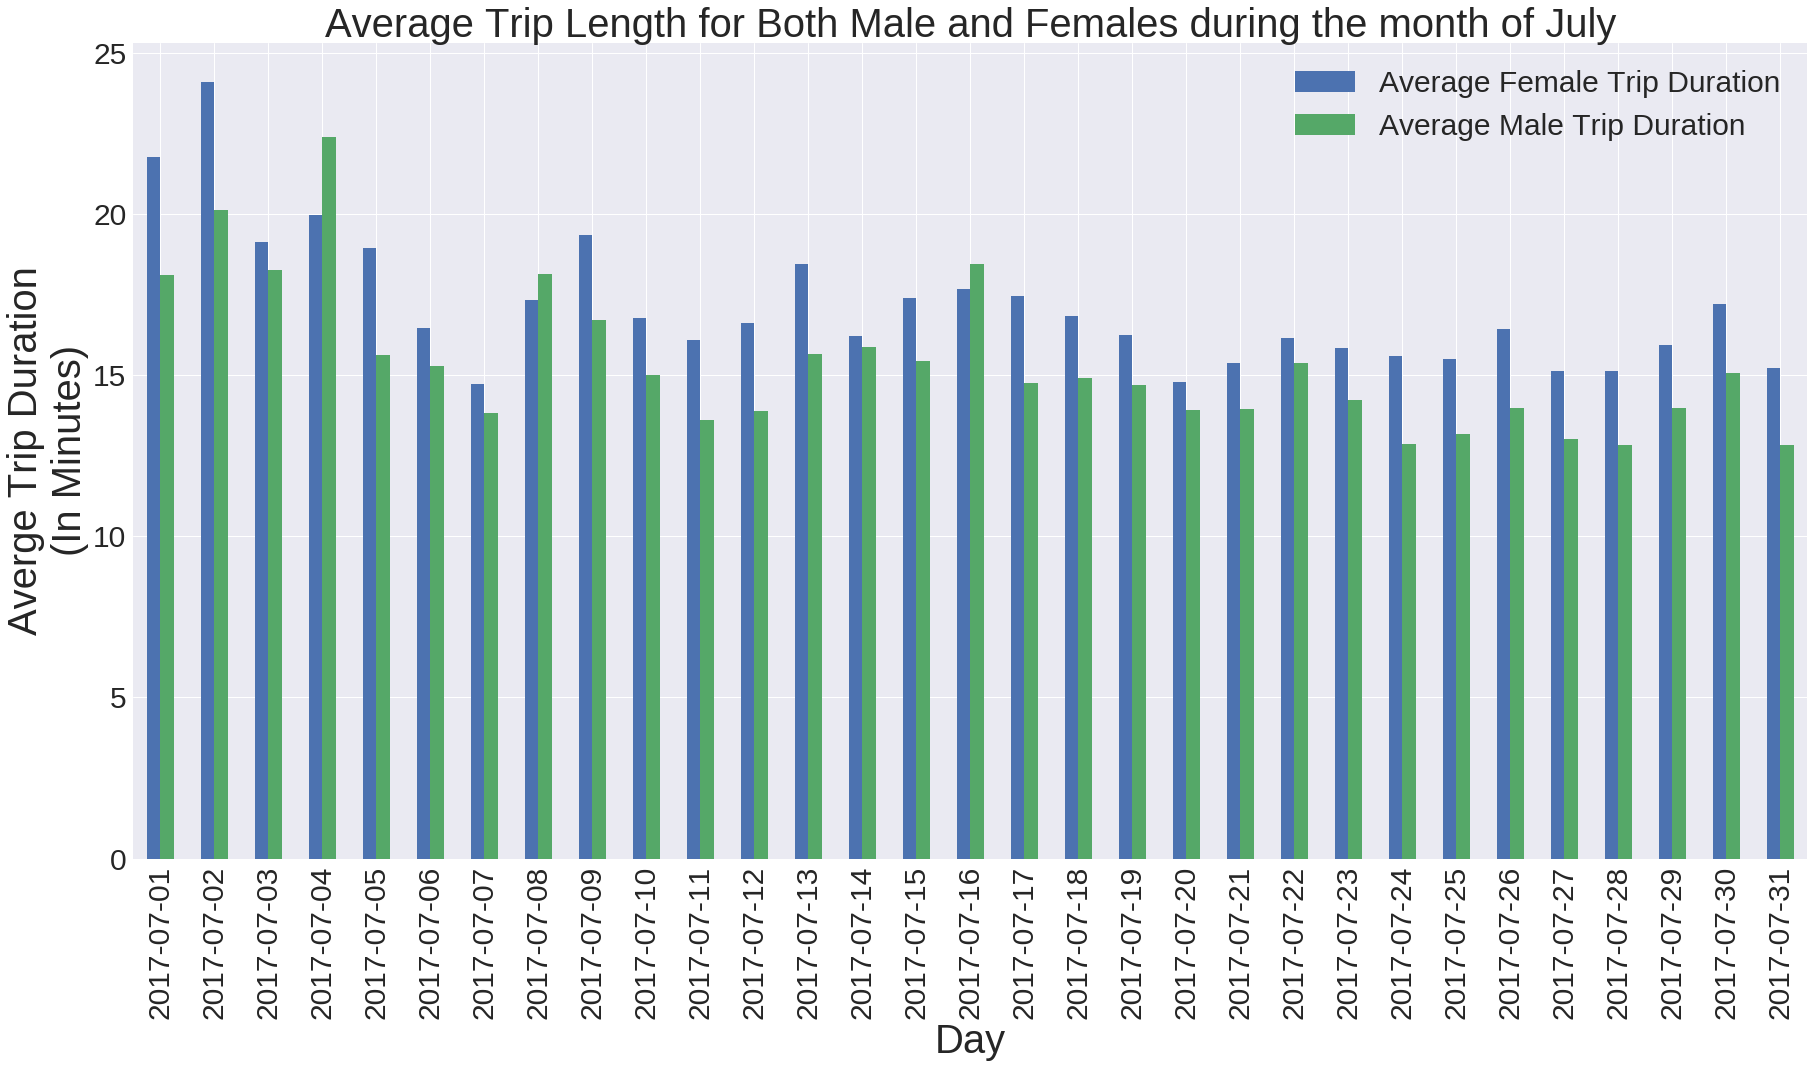

In [27]:
ax3 = gender_df.plot(kind='bar',figsize=(30,15), fontsize='30')
ax3.set_ylabel("Averge Trip Duration\n(In Minutes)", fontsize="40")
ax3.set_xlabel("Day", fontsize="40")
ax3.set_title('Average Trip Length for Both Male and Females during the month of July', fontsize='40')
ax3.legend(["Average Female Trip Duration","Average Male Trip Duration"],fontsize='30')

## Figure 3: Average Trip Length for Both Male and Female's during the Month of July

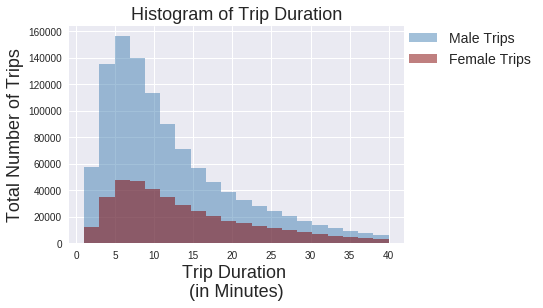

In [95]:
#hist(hist1.tripduration, bins=20, color="grey", alpha=0.5, label="Total Trips")
hist(hist2.tripduration, bins=20, color="SteelBlue", alpha=0.5, label="Male Trips")
hist(hist3.tripduration, bins=20, color="maroon", alpha=0.5, label="Female Trips")



plt.xlabel("Trip Duration \n(in Minutes)",fontsize="18")
plt.ylabel("Total Number of Trips",fontsize="18")
plt.title("Histogram of Trip Duration",fontsize="18")
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.,fontsize="14")

In [91]:
gender_df.describe()

,Average Female Trip Duration,Average Male Trip Duration
count,31.000000,31.000000
mean,17.093857,15.356587
std,2.096811,2.271954
min,14.734951,12.826346
25%,15.716917,13.902359
50%,16.465340,14.927783
75%,17.564824,15.765576
max,24.100578,22.380926


In [92]:
hist2.describe()

,tripduration
count,1.076311e+06
mean,1.199839e+01
std,8.212844e+00
min,1.016667e+00
25%,5.850000e+00
50%,9.566667e+00
75%,1.606667e+01
max,3.998333e+01


In [93]:
hist3.describe()

,tripduration
count,388897.000000
mean,13.680409
std,8.632700
min,1.016667
25%,6.966667
50%,11.383333
75%,18.650000
max,39.983333
